<a href="https://colab.research.google.com/github/ansal1202/titanic-analysis/blob/main/2024_Task_04%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_%E7%89%B9%E5%BE%B5%E5%84%AA%E5%8C%96%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#載入數據
#觀察資料
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
print(display(df))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


None


In [2]:
#觀察屬性、是否有缺失值
display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


可觀察出部分欄位有缺失值

In [3]:
#判斷是否有空值以及欄型態
# prompt: 使用 DataFrame df:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


根據meta data可得知以下訊息:

PassengerId：乘客ID對分析目標沒有幫助，因為它只是個ID做唯一值使用，可排除

Cabin:缺失值過多，可能失去統計意義，可排除


Text(0.5, 1.0, 'Correlation Heatmap of Titanic')

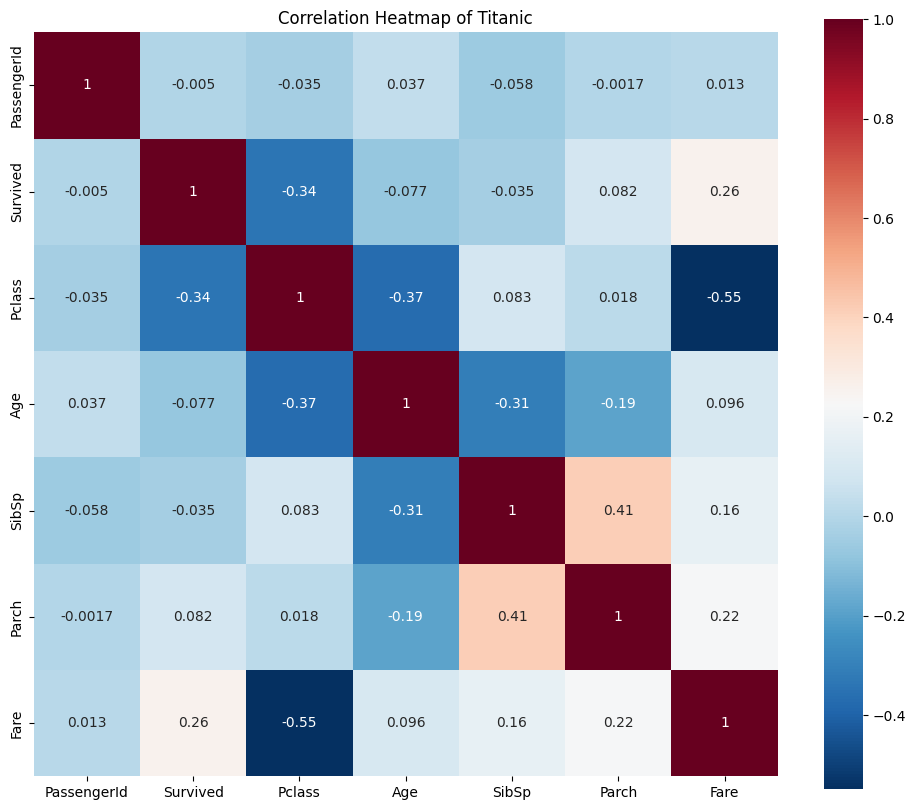

In [4]:
#觀察每一個數值欄位與「是否生存欄位」之關係程度
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#選取數值欄位
df_encoded = df.select_dtypes(include=[np.number])
corr =df_encoded.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,cmap='RdBu_r',square=True,annot=True)
plt.title("Correlation Heatmap of Titanic")



可觀察到Fare（船票價格）與Survived(生存)的相關程度較高

可進一步觀察各屬性和Survived的相關程度

In [5]:

# 定義distribution函數，以KDE圖觀察欄位與Survived之間的關係

def distribution(df,var,target,**kwargs):
  # 設定row和col參數
  row = kwargs.get('row',None)
  col = kwargs.get('col',None)
  # 使用seaborn函數製圖
  facet = sns.FacetGrid(df,row=row,col=col,hue=target,aspect=3)
  facet.map(sns.kdeplot,var,fill=True)
  facet.set(xlim=(0,df[var].max()))
  facet.add_legend()

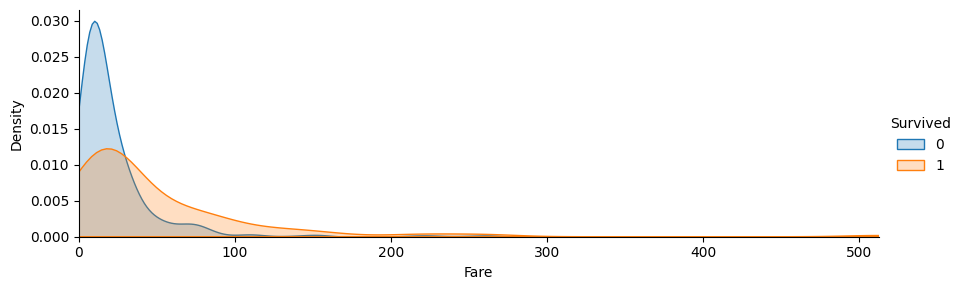

In [6]:
# 觀察Fare和Survived的關係
distribution(df,var='Fare',target='Survived')
plt.show()

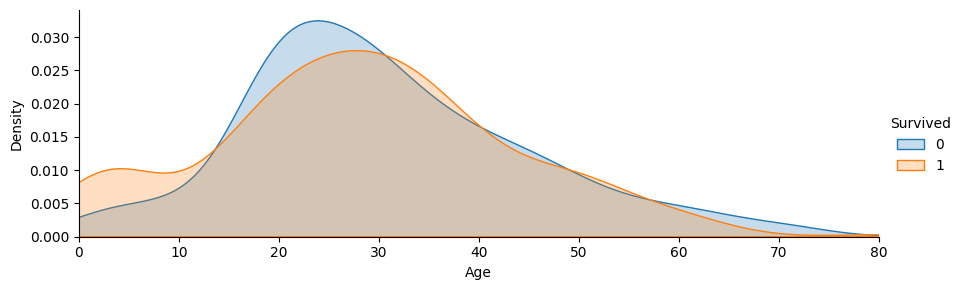

In [7]:
# 觀察Age和Survived的關係
distribution(df,var='Age',target='Survived')
plt.show()

In [8]:
# 定義categories函數，以觀察離散的值與Survived之間的關係，已長條圖呈現
def categories(df,cat,target,**kwargs):
  # 設定row和col參數
  row = kwargs.get('row',None)
  col = kwargs.get('col',None)

  # 使用seaborn函數製圖
  facet = sns.FacetGrid(df,row=row,col=col)
  facet.map(sns.barplot,cat,target)
  facet.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


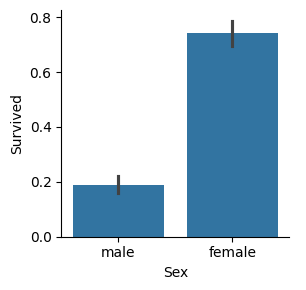

In [9]:
# 觀察Sex和Survived的關係
categories(df,cat='Sex',target='Survived')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


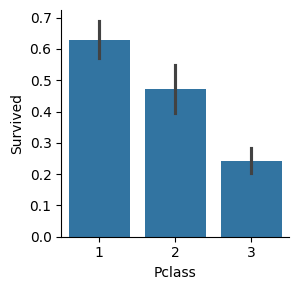

In [10]:
# 觀察Pclass和Survived的關係
categories(df,cat='Pclass',target='Survived')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


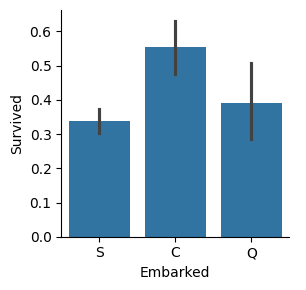

In [11]:
# 觀察Embarked和Survived的關係
categories(df,cat='Embarked',target='Survived')
plt.show()

從上圖可以觀察到的結果如下:

Fare:票價低的乘客死亡率好像特別高

Age:小孩子的生存率似乎略高一些

Sex:在鐵達尼號中，大部分的男性都死亡，而女性則大部分都存活

Pclass:可以預期到，頭等艙的乘客生存機率會比較高，也的確是艙等越高生存率越高

Embarked:可以注意到不同的出發港的生存率不同

**資料清理與型態轉換**

In [3]:
#排除多於欄位
df_clean = df.copy()
df_clean.drop(columns=['PassengerId','Cabin'],axis=1,inplace=True)

1. 刪除多餘的欄位

PassengerId本身無意義，可以先移除

Cabin缺失值過多，可以排除

**填補缺失值**

可以嘗試使用以下方法填補Age的缺失值：

眾數填補

中位數填補

平均數填補

In [4]:
# 使用平均數填補
age_mean = df_clean.copy()
age_mean['Age'].fillna(age_mean['Age'].mean(),inplace=True)

# 使用中位數填補
age_median = df_clean.copy()
age_median['Age'].fillna(age_median['Age'].median(),inplace=True)

# 使用眾數填補
age_mode = df_clean.copy()
age_mode['Age'].fillna(age_mode['Age'].mode()[0],inplace=True)

# Comparing the results
age_fill = pd.DataFrame({
    "Original": df_clean['Age'],
    "age_mean": age_mean['Age'],
    "age_median": age_median['Age'],
    "age_mode": age_mode['Age']
})
age_fill
display(age_fill.describe())



,Original,age_mean,age_median,age_mode
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,29.699118,29.361582,28.566970
std,14.526497,13.002015,13.019697,13.199572
min,0.420000,0.420000,0.420000,0.420000
25%,20.125000,22.000000,22.000000,22.000000
50%,28.000000,29.699118,28.000000,24.000000
75%,38.000000,35.000000,35.000000,35.000000
max,80.000000,80.000000,80.000000,80.000000


**非數值型欄位處理**

In [5]:
import pandas as pd
# Sex直接轉換
df_clean['Sex'] = df_clean['Sex'].replace({'male':1,'female':0})

# Embarked使用OneHotEncoder
embark = pd.get_dummies(df_clean['Embarked'], prefix="Embarked",dtype=int)
pclass = pd.get_dummies(df_clean['Pclass'], prefix="Pclass",dtype=int)
df_clean = pd.concat([df_clean,embark],axis=1)
df_clean = pd.concat([df_clean,pclass],axis=1)
print(df_clean.head())


   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    1   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen, Miss. Laina    0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen, Mr. William Henry    1   

    Age  SibSp  Parch            Ticket     Fare Embarked  Embarked_C  \
0  22.0      1      0         A/5 21171   7.2500        S           0   
1  38.0      1      0          PC 17599  71.2833        C           1   
2  26.0      0      0  STON/O2. 3101282   7.9250        S           0   
3  35.0      1      0            113803  53.1000        S           0   
4  35.0      0      0            373450   8.0500        S           0   

   Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           0           1   

**特徵工程**

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


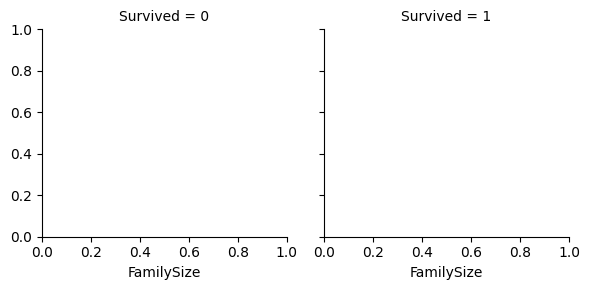

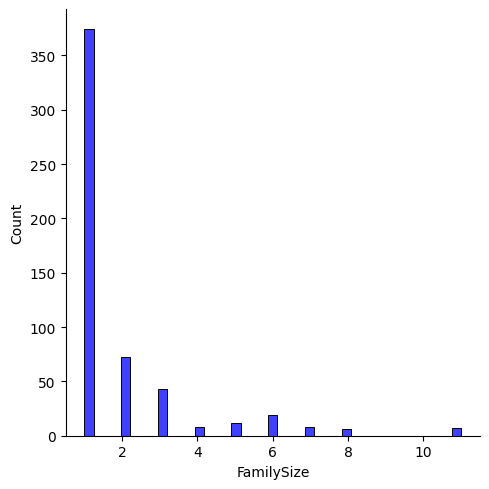

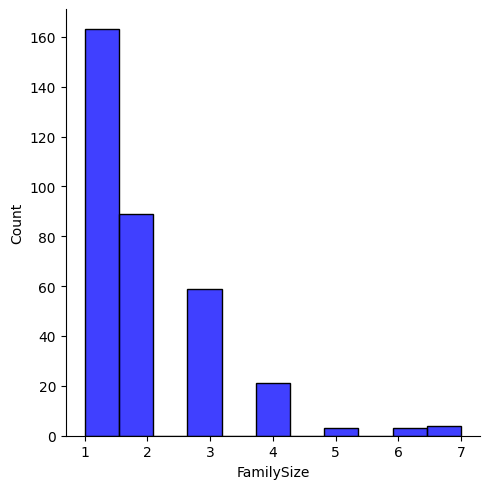

In [6]:
import seaborn as sns
#新增FamilySize欄位統整乘客在船上的親屬人數
df_clean['FamilySize'] = df_clean['SibSp']+df_clean['Parch']+1

Family = sns.FacetGrid(df_clean,col='Survived')
Family.map(sns.displot,'FamilySize',kde=False,color='blue')


In [9]:
# 定義family函數，家族人數在2~4個，定義為small;家族人數超過5個定義為large
family = df_clean.copy()

family['FamilySize'] = family['SibSp'] + family['Parch'] + 1
family['FamilySingle'] = family['FamilySize'].map(lambda s : 1 if s == 1 else 0)
family['FamilySmall']  = family['FamilySize'].map(lambda s : 1 if 2 <= s <= 4 else 0)
family['FamilyLarge']  = family['FamilySize'].map(lambda s : 1 if 2 <= s <= 4 else 0)

# Comparing the results
family = family.loc[:,['FamilySingle','FamilySmall','FamilyLarge']]
print(family.head())

   FamilySingle  FamilySmall  FamilyLarge
0             0            1            1
1             0            1            1
2             1            0            0
3             0            1            1
4             1            0            0


In [10]:
# 將處理過的資料合併
df_all = pd.concat([df_clean,age_fill,family],axis=1)
display(df_all.describe())
print(df_all.head())


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_2,Pclass_3,FamilySize,Original,age_mean,age_median,age_mode,FamilySingle,FamilySmall,FamilyLarge
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,...,0.206510,0.551066,1.904602,29.699118,29.699118,29.361582,28.566970,0.602694,0.327722,0.327722
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,...,0.405028,0.497665,1.613459,14.526497,13.002015,13.019697,13.199572,0.489615,0.469646,0.469646
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.420000,0.420000,0.420000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,20.125000,22.000000,22.000000,22.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,28.000000,29.699118,28.000000,24.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,2.000000,38.000000,35.000000,35.000000,35.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,11.000000,80.000000,80.000000,80.000000,80.000000,1.000000,1.000000,1.000000


   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    1   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen, Miss. Laina    0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen, Mr. William Henry    1   

    Age  SibSp  Parch            Ticket     Fare Embarked  ...  Pclass_2  \
0  22.0      1      0         A/5 21171   7.2500        S  ...         0   
1  38.0      1      0          PC 17599  71.2833        C  ...         0   
2  26.0      0      0  STON/O2. 3101282   7.9250        S  ...         0   
3  35.0      1      0            113803  53.1000        S  ...         0   
4  35.0      0      0            373450   8.0500        S  ...         0   

   Pclass_3  FamilySize  Original  age_mean  age_median  age_mode  \

In [13]:
# 將變數加入模型，利於比較不同填補方式的差異
df_model_mean  = df_all[["Survived", "Pclass", "Fare", "age_mean", "Sex", "FamilySingle", "FamilySmall", "FamilyLarge", "Pclass_1", "Pclass_2", "Pclass_3", "Embarked_C"]]
df_model_median = df_all[["Survived", "Pclass", "Fare", "age_median", "Sex", "FamilySingle", "FamilySmall", "FamilyLarge", "Pclass_1", "Pclass_2", "Pclass_3", "Embarked_C"]]
df_model_mode  = df_all[["Survived", "Pclass", "Fare", "age_mode", "Sex", "FamilySingle", "FamilySmall", "FamilyLarge", "Pclass_1", "Pclass_2", "Pclass_3", "Embarked_C"]]

**模型分析**

1.評估利用平均數填補age時的準確度

In [18]:
#定義特徵欄位X、目標欄位Y，並完成訓練集資料
columns_X = list(set(df_model_mean.columns) - {'Survived'})
columns_y = ['Survived']

train_X = df_model_mean[columns_X]
train_y = df_model_mean[columns_y]

# Identify non-numerical columns
non_numeric_columns = train_X.select_dtypes(exclude=['number']).columns

# Handle non-numerical columns (example: one-hot encoding)
train_X_encoded = pd.get_dummies(train_X, columns=non_numeric_columns)

#使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores_mean = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores_mean)
print(scores_mean.mean())

[0.81564246 0.80337079 0.79213483 0.79775281 0.8258427 ]
0.8069487163392128


In [19]:
#定義特徵欄位X、目標欄位Y，並完成訓練集資料
columns_X = list(set(df_model_median.columns) - {'Survived'})
columns_y = ['Survived']

train_X = df_model_median[columns_X]
train_y = df_model_median[columns_y]

# Identify non-numerical columns
non_numeric_columns = train_X.select_dtypes(exclude=['number']).columns

# Handle non-numerical columns (example: one-hot encoding)
train_X_encoded = pd.get_dummies(train_X, columns=non_numeric_columns)

#使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores_median = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores_median)
print(scores_median.mean())

[0.81564246 0.80337079 0.79213483 0.79775281 0.8258427 ]
0.8069487163392128


In [20]:
#定義特徵欄位X、目標欄位Y，並完成訓練集資料
columns_X = list(set(df_model_mode.columns) - {'Survived'})
columns_y = ['Survived']

train_X = df_model_mode[columns_X]
train_y = df_model_mode[columns_y]

# Identify non-numerical columns
non_numeric_columns = train_X.select_dtypes(exclude=['number']).columns

# Handle non-numerical columns (example: one-hot encoding)
train_X_encoded = pd.get_dummies(train_X, columns=non_numeric_columns)

#使用 Logistic Regression 模型，進行交叉驗證以評估準確度
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores_mode = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores_mode)
print(scores_mode.mean())

[0.81005587 0.79213483 0.79775281 0.79775281 0.81460674]
0.8024606113866047


In [25]:
#比較結果
scores = {'strategy':['age_mean','age_median','age_mode'],
        'accuracy':[scores_mean.mean(),scores_median.mean(),scores_mode.mean()]}
compared = pd.DataFrame(scores)
compared.sort_values(by='accuracy')

,strategy,accuracy
0,age_mean,0.806949
1,age_median,0.806949
2,age_mode,0.802461


目前填補缺失值得方式在此專案中看起來差異不大